In [11]:

! pip3 install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 45.6 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [12]:
## 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 가져오기
from matplotlib import rc
# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'AppleGothic'

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

from sklearn.preprocessing import PowerTransformer,StandardScaler,OneHotEncoder
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge, Lasso
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [13]:
df=pd.read_csv('data/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

## 타겟값

In [5]:
X_train=df.drop('price_range',axis=1)
y_train=df.price_range

In [6]:
y_train.value_counts()
# 타겟 값이 균형을 이루고 있다. 그러므로 나중에 모델링 할 때 불규칙한 결과를 걱정할 필요가 없음
# 오버샘플링 및 언더샘플링이 필요가 없어짐

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

## 열 설명

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

- battery_power: 배터리 용량, 밀리암페어시(mAh) 단위로 측정되며, 배터리의 총 전력을 나타냅니다
- blue: 블루투스 지원 여부, 1이면 지원, 0이면 미지원.
- clock_speed: 장치의 프로세서 클럭 속도, 기가헤르츠(GHz) 단위로 측정되며, CPU가 데이터를 처리하는 속도를 나타냅니다.
- dual_sim: 듀얼 SIM 지원 여부, 1이면 듀얼 SIM을 지원, 0이면 지원하지 않음.
- fc: 전면 카메라 해상도, 메가픽셀(MP) 단위로 측정되며, 전면 카메라의 성능을 나타냅니다.
- four_g: 4G 네트워크 지원 여부, 1이면 지원, 0이면 지원하지 않음.
- int_memory: 내부 저장 용량, 기가바이트(GB) 단위로 측정되며, 장치의 내부 저장 공간 크기를 나타냅니다.
- m_dep: 장치의 두께, 센티미터(cm) 단위로 측정됩니다.
- mobile_wt: 모바일 장치의 무게, 그램(g) 단위로 측정됩니다.
- n_cores: 장치의 프로세서 코어 수, 프로세서의 병렬 처리 성능을 나타냅니다.
- pc: 후면 카메라 해상도, 메가픽셀(MP) 단위로 측정되며, 후면 카메라의 성능을 나타냅니다.
- px_height: 스크린 해상도의 세로 픽셀 수, 화면 해상도에서 세로 방향의 픽셀 수를 나타냅니다.
- px_width: 스크린 해상도의 가로 픽셀 수, 화면 해상도에서 가로 방향의 픽셀 수를 나타냅니다.
- ram: 장치의 RAM 크기, 메가바이트(MB) 또는 기가바이트(GB) 단위로 측정되며, 장치의 메모리 용량을 나타냅니다.
- sc_h: 화면 높이, 센티미터(cm) 단위로 측정됩니다.
- sc_w: 화면 너비, 센티미터(cm) 단위로 측정됩니다.
- talk_time: 장치의 통화 시간, 한 번 충전 후 장치가 지속적으로 통화할 수 있는 시간(분 단위)입니다.
- three_g: 3G 네트워크 지원 여부, 1이면 지원, 0이면 지원하지 않음.
- touch_screen: 터치스크린 지원 여부, 1이면 지원, 0이면 지원하지 않음.
- wifi: Wi-Fi 지원 여부, 1이면 지원, 0이면 지원하지 않음.

In [21]:
df.columns = ['배터리_용량', '블루투스', '클럭_속도', '듀얼_SIM', '전면_카메라', '4G_지원',
               '내장_메모리', '두께', '무게', '코어_수', '후면_카메라', '화면_세로_픽셀',
               '화면_가로_픽셀', 'RAM', '화면_높이', '화면_너비', '통화_시간', '3G_지원',
               '터치스크린_지원', 'Wi-Fi_지원','가격범위']

##  시작
1. 가설
2. 전처리
3. eda
4. 모델링
5. 결과

### 1. 가설
- 배터리, 메모리가 좋고, 많은 외부장치를 지원하고, 무게가 가벼우며 화면이 클수록 가격대가 높을 것이다.

### 2. 전처리

In [9]:
df.isnull().sum()
# 결측치가 없다.

배터리_용량      0
블루투스        0
클럭_속도       0
듀얼_SIM      0
전면_카메라      0
4G_지원       0
내장_메모리      0
두께          0
무게          0
코어_수        0
후면_카메라      0
화면_세로_픽셀    0
화면_가로_픽셀    0
RAM         0
화면_높이       0
화면_너비       0
통화_시간       0
3G_지원       0
터치스크린_지원    0
Wi-Fi_지원    0
가격범위        0
dtype: int64

### 3. eda

In [10]:
df.info()
# 모두 수치형임을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   배터리_용량    2000 non-null   int64  
 1   블루투스      2000 non-null   int64  
 2   클럭_속도     2000 non-null   float64
 3   듀얼_SIM    2000 non-null   int64  
 4   전면_카메라    2000 non-null   int64  
 5   4G_지원     2000 non-null   int64  
 6   내장_메모리    2000 non-null   int64  
 7   두께        2000 non-null   float64
 8   무게        2000 non-null   int64  
 9   코어_수      2000 non-null   int64  
 10  후면_카메라    2000 non-null   int64  
 11  화면_세로_픽셀  2000 non-null   int64  
 12  화면_가로_픽셀  2000 non-null   int64  
 13  RAM       2000 non-null   int64  
 14  화면_높이     2000 non-null   int64  
 15  화면_너비     2000 non-null   int64  
 16  통화_시간     2000 non-null   int64  
 17  3G_지원     2000 non-null   int64  
 18  터치스크린_지원  2000 non-null   int64  
 19  Wi-Fi_지원  2000 non-null   int64  
 20  가격범위      2000 non-null   int6

In [11]:
df.describe()
# 연속형: 배터리 용량, 클럭 속도,
# 범주형:

,배터리_용량,블루투스,클럭_속도,듀얼_SIM,전면_카메라,4G_지원,내장_메모리,두께,무게,코어_수,...,화면_세로_픽셀,화면_가로_픽셀,RAM,화면_높이,화면_너비,통화_시간,3G_지원,터치스크린_지원,Wi-Fi_지원,가격범위
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
df.화면_세로_픽셀.value_counts()

화면_세로_픽셀
347    7
179    6
371    6
275    6
674    5
      ..
87     1
648    1
341    1
993    1
483    1
Name: count, Length: 1137, dtype: int64

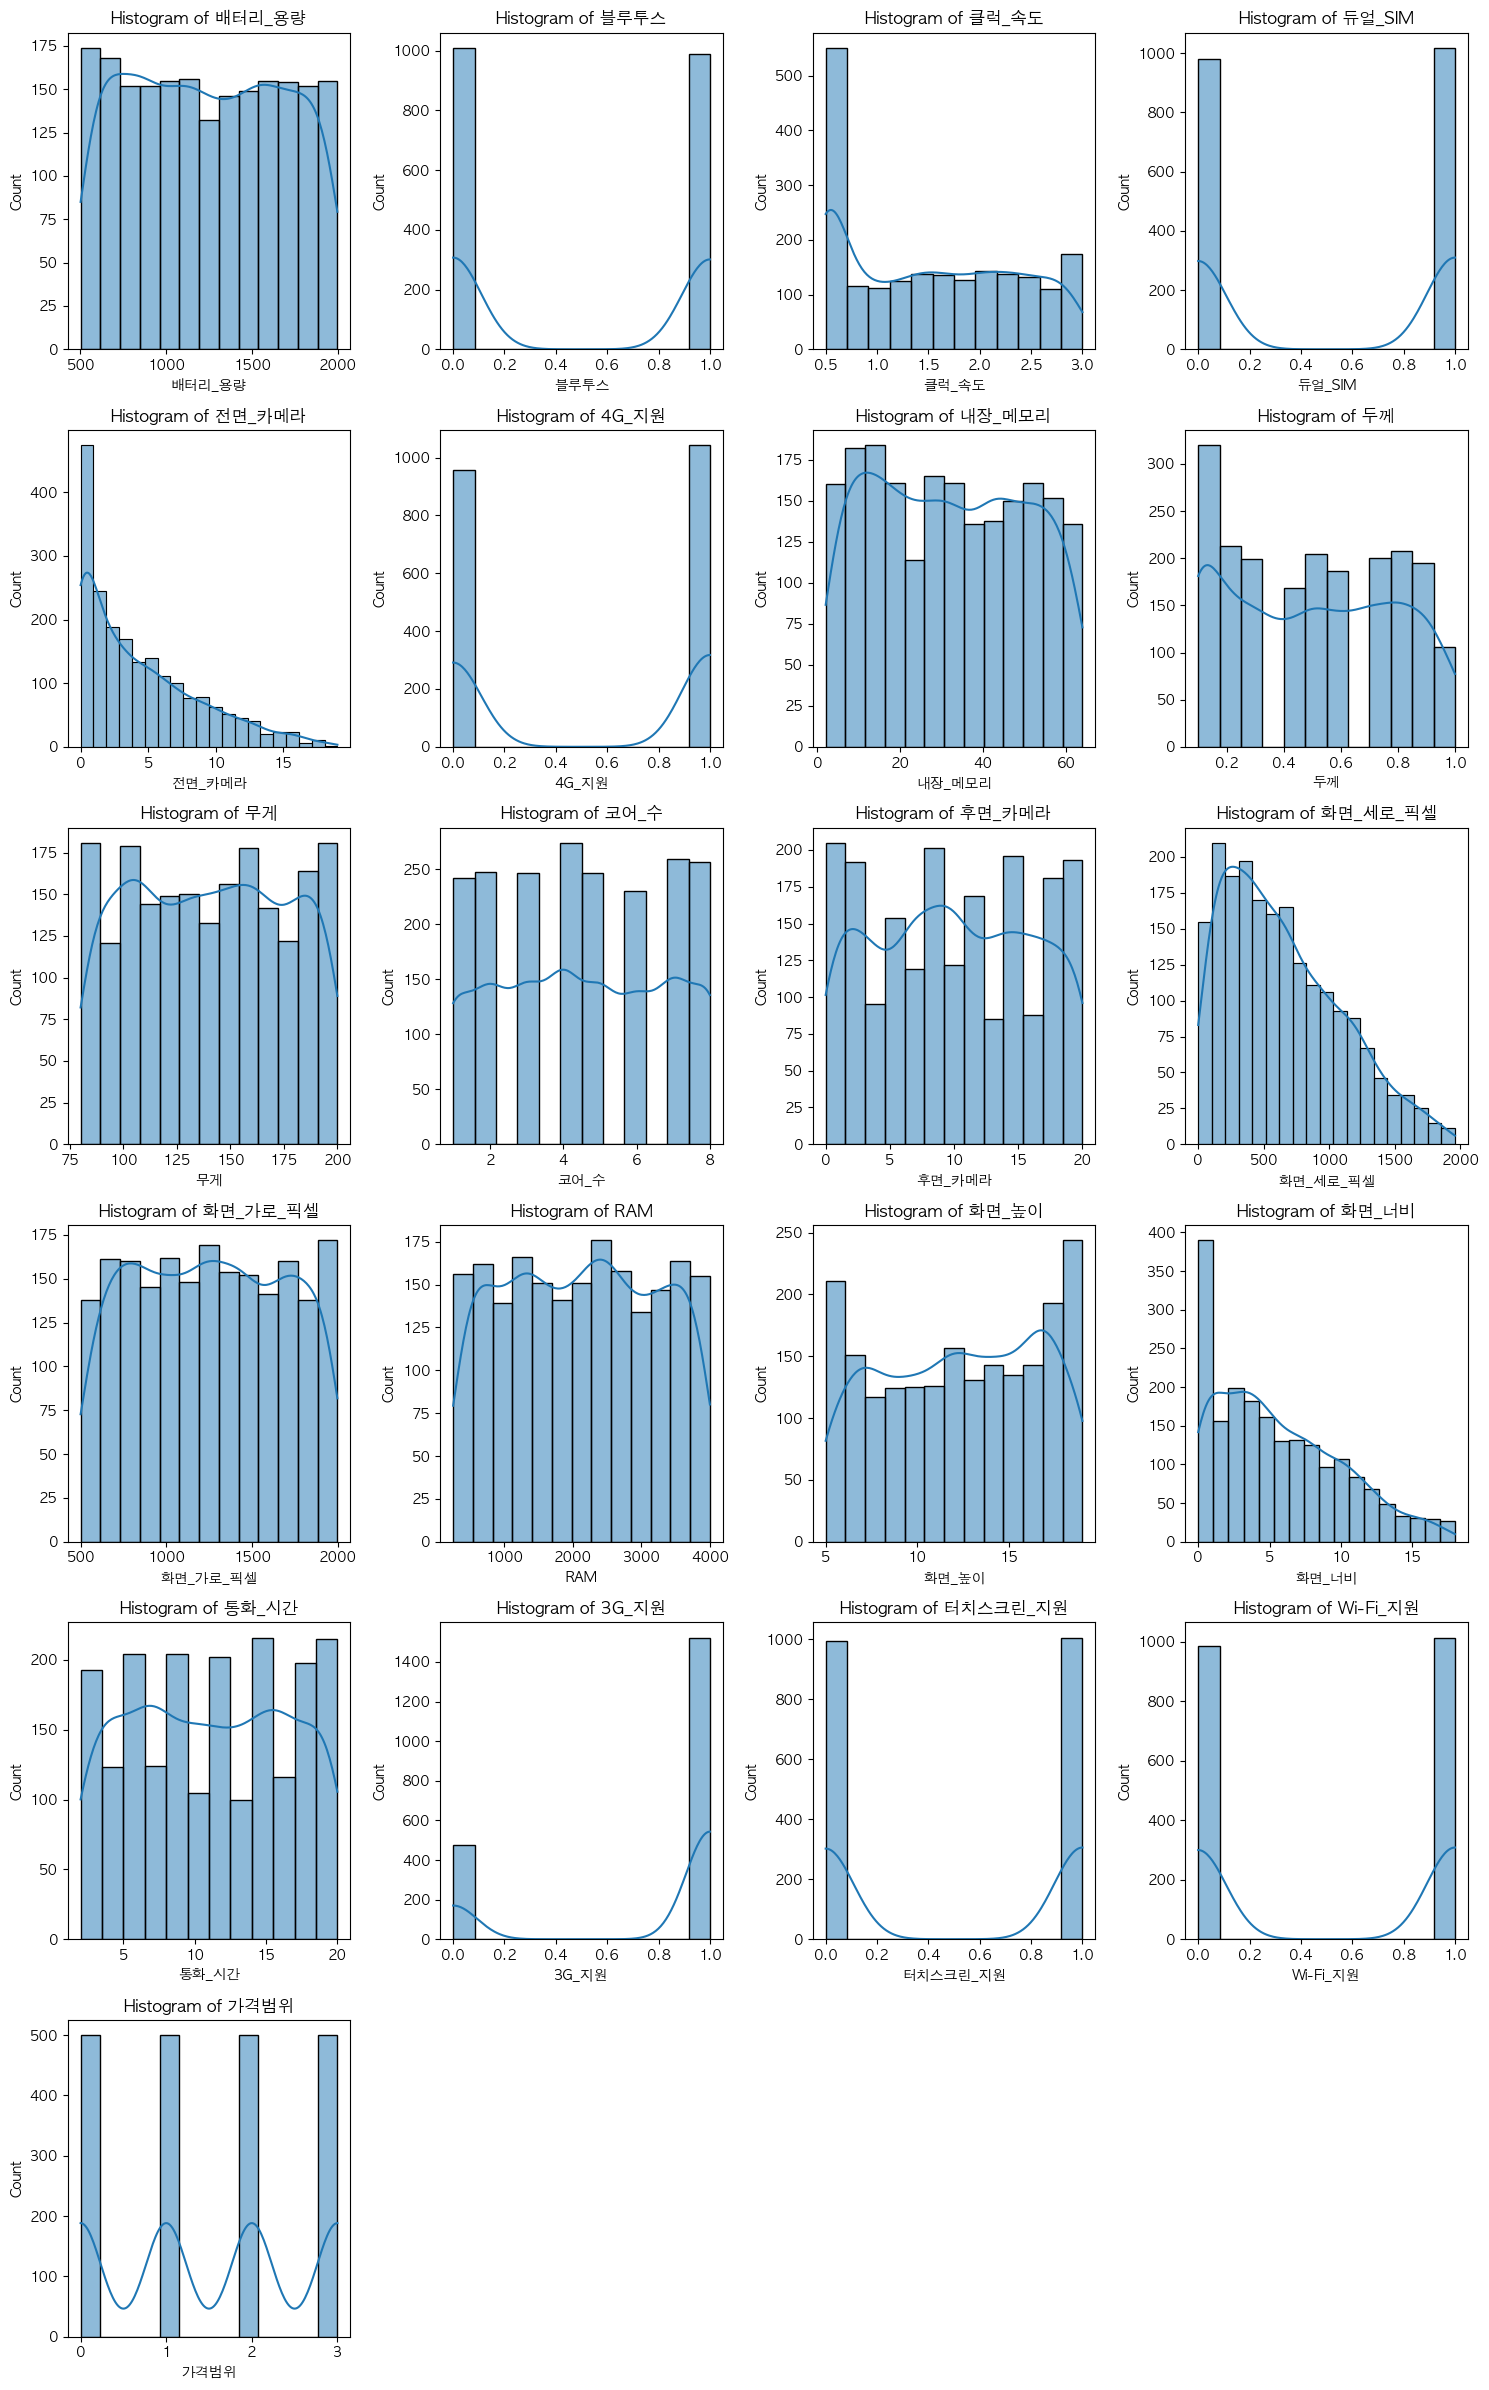

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램을 그리기 위한 함수
def plot_histograms(df):
    num_vars = df.select_dtypes(include=['float64', 'int64']).columns
    num_plots = len(num_vars)

    # 한 행에 4개씩 표시, 그에 따른 행(row) 수 계산
    num_cols = 4
    num_rows = (num_plots + num_cols - 1) // num_cols  # 올림 계산

    plt.figure(figsize=(15, num_rows * 4))

    for i, col in enumerate(num_vars):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

# 히스토그램 그리기
plot_histograms(df)

# 연속형: 배터리 용량, 전면카메라, 클럭 속도, 내장 메모리, 무게, 후면_카메라,화면_세로_픽셀,화면_가로_픽셀,ram,높이,너비,통화시간
# 범주형: 블루투스,듀얼심,4g, 두께, 코어수, 3g,터치스크린,wifi

#### 연속형 변수와 타겟값과의 관계

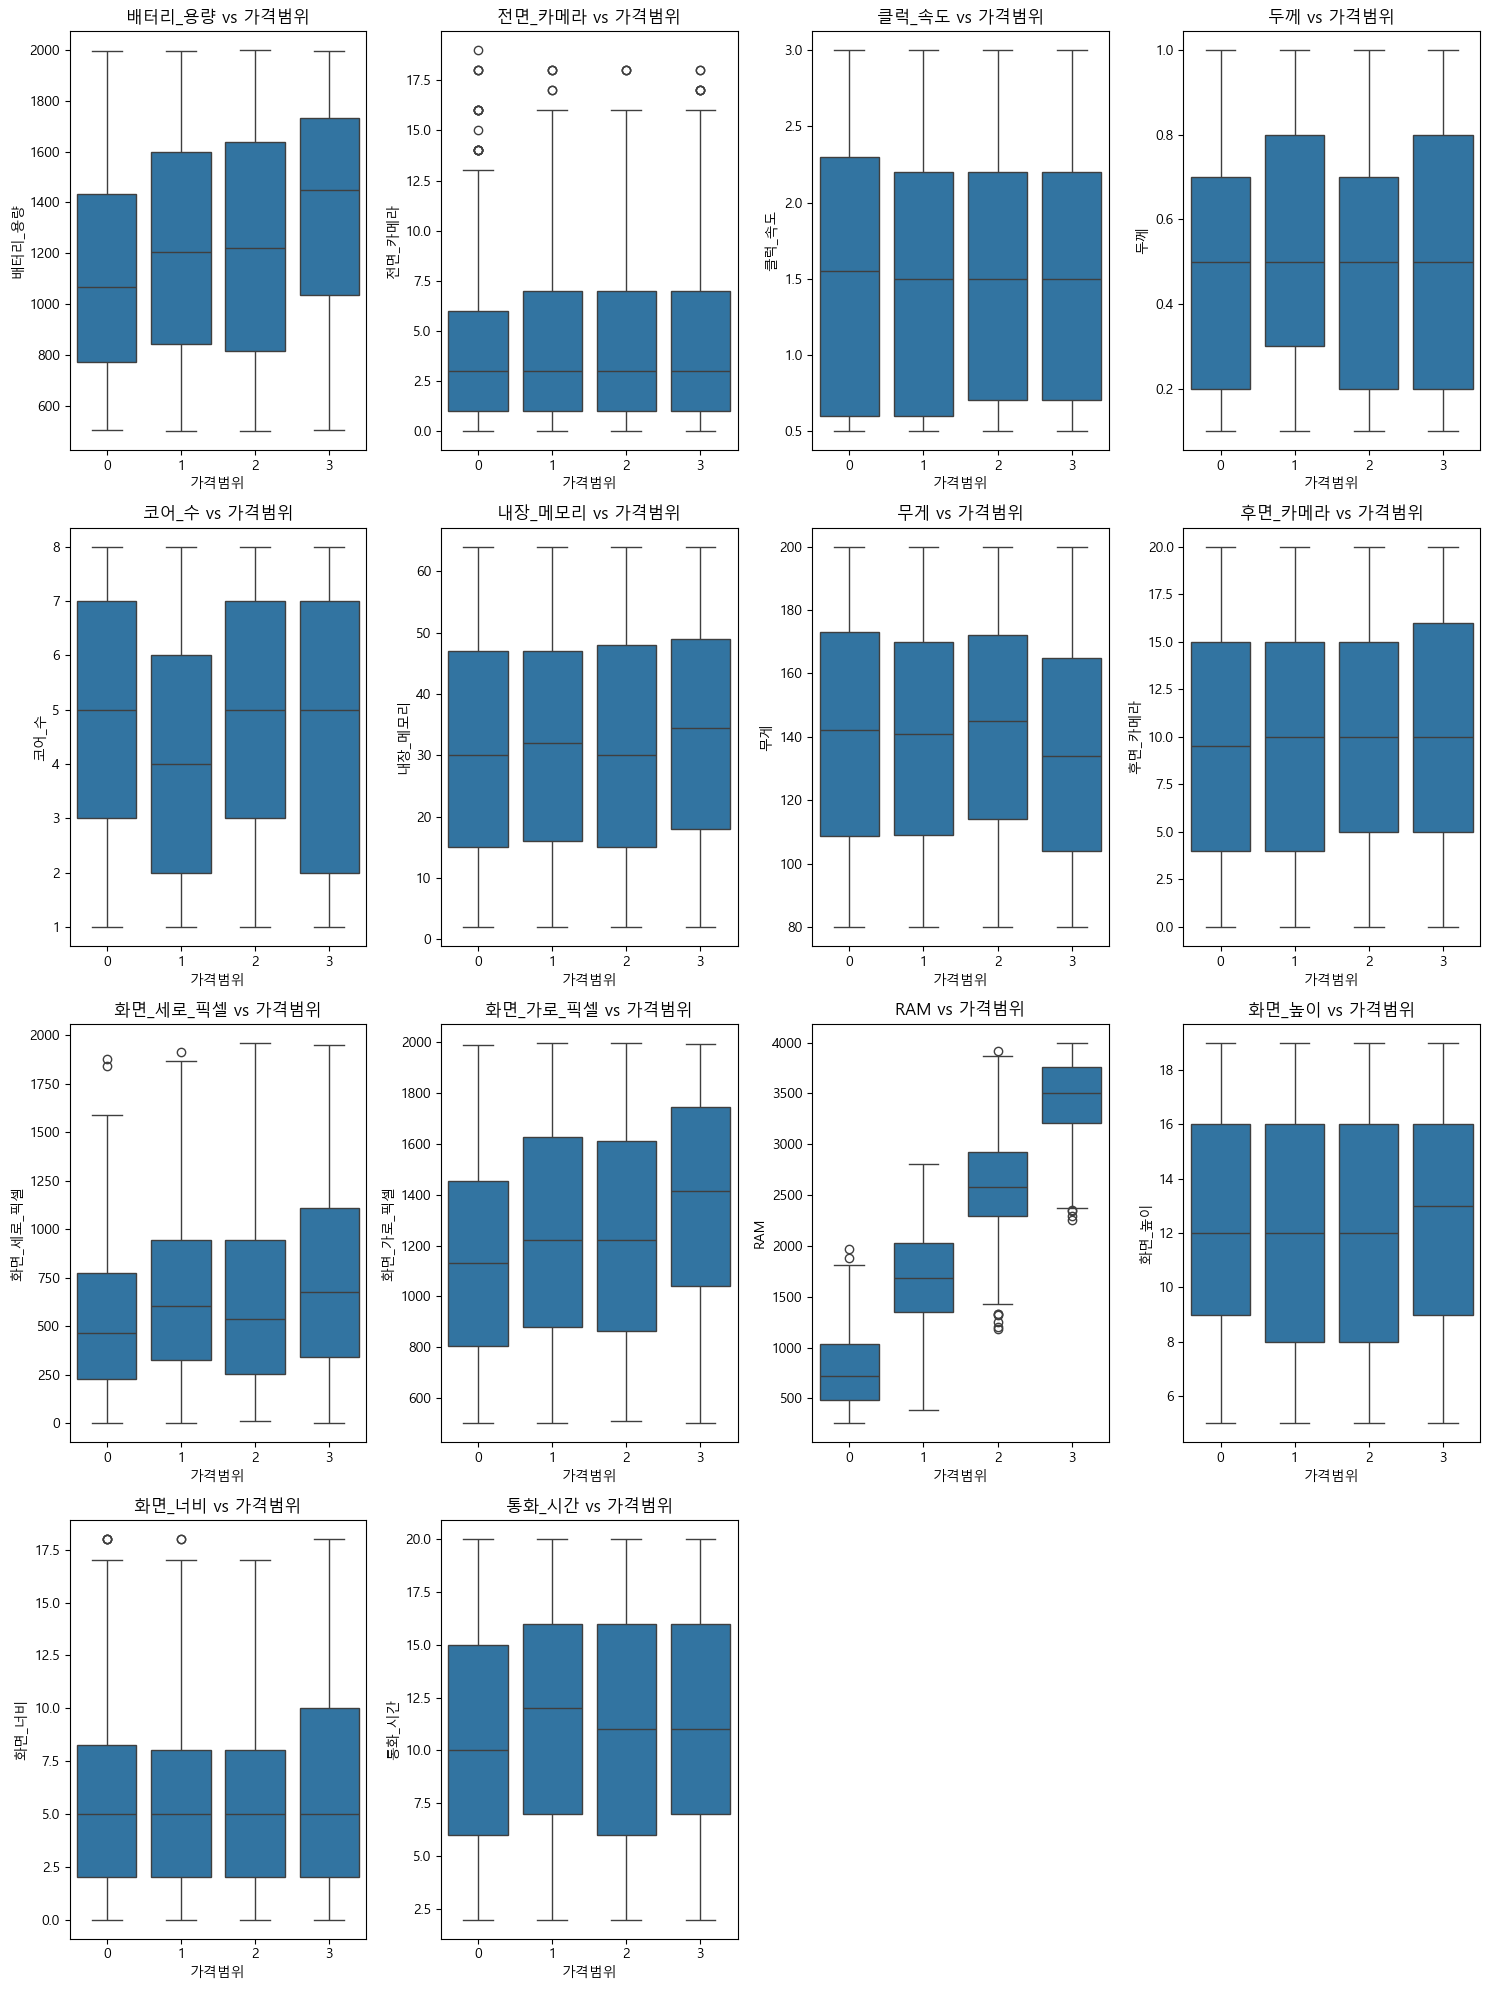

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연속형 변수 목록
continuous_vars = ['배터리_용량', '전면_카메라', '클럭_속도','두께','코어_수', '내장_메모리', '무게',
                   '후면_카메라', '화면_세로_픽셀', '화면_가로_픽셀', 'RAM', '화면_높이',
                   '화면_너비', '통화_시간']

# 박스플롯을 그리기 위한 함수
def plot_boxplots(df, continuous_vars, target_var):
    num_plots = len(continuous_vars)

    # 한 행에 4개씩 표시, 그에 따른 행(row) 수 계산
    num_cols = 4
    num_rows = (num_plots + num_cols - 1) // num_cols  # 올림 계산

    plt.figure(figsize=(15, num_rows * 5))  # 그래프 간격을 위해 높이를 5로 조정

    for i, col in enumerate(continuous_vars):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(x=df[target_var], y=df[col])
        plt.title(f'{col} vs {target_var}')

    plt.tight_layout()
    plt.show()

# 박스플롯 그리기
plot_boxplots(df, continuous_vars, '가격범위')


- 배터리 용량, 세로,가로 픽셀,ram, 화면 너비가 클수록 가격 범위가 높아지는 것이 확인된다.
- 무게가 가벼워질수록 가격이 높아지기도 한다. 
- ram이 가장 큰 영향을 미칠 것 같다.
- 나머지 변수들은 가격에 크게 영향을 미치지 않는다.

#### 범주형 변수와 타겟과의 관계

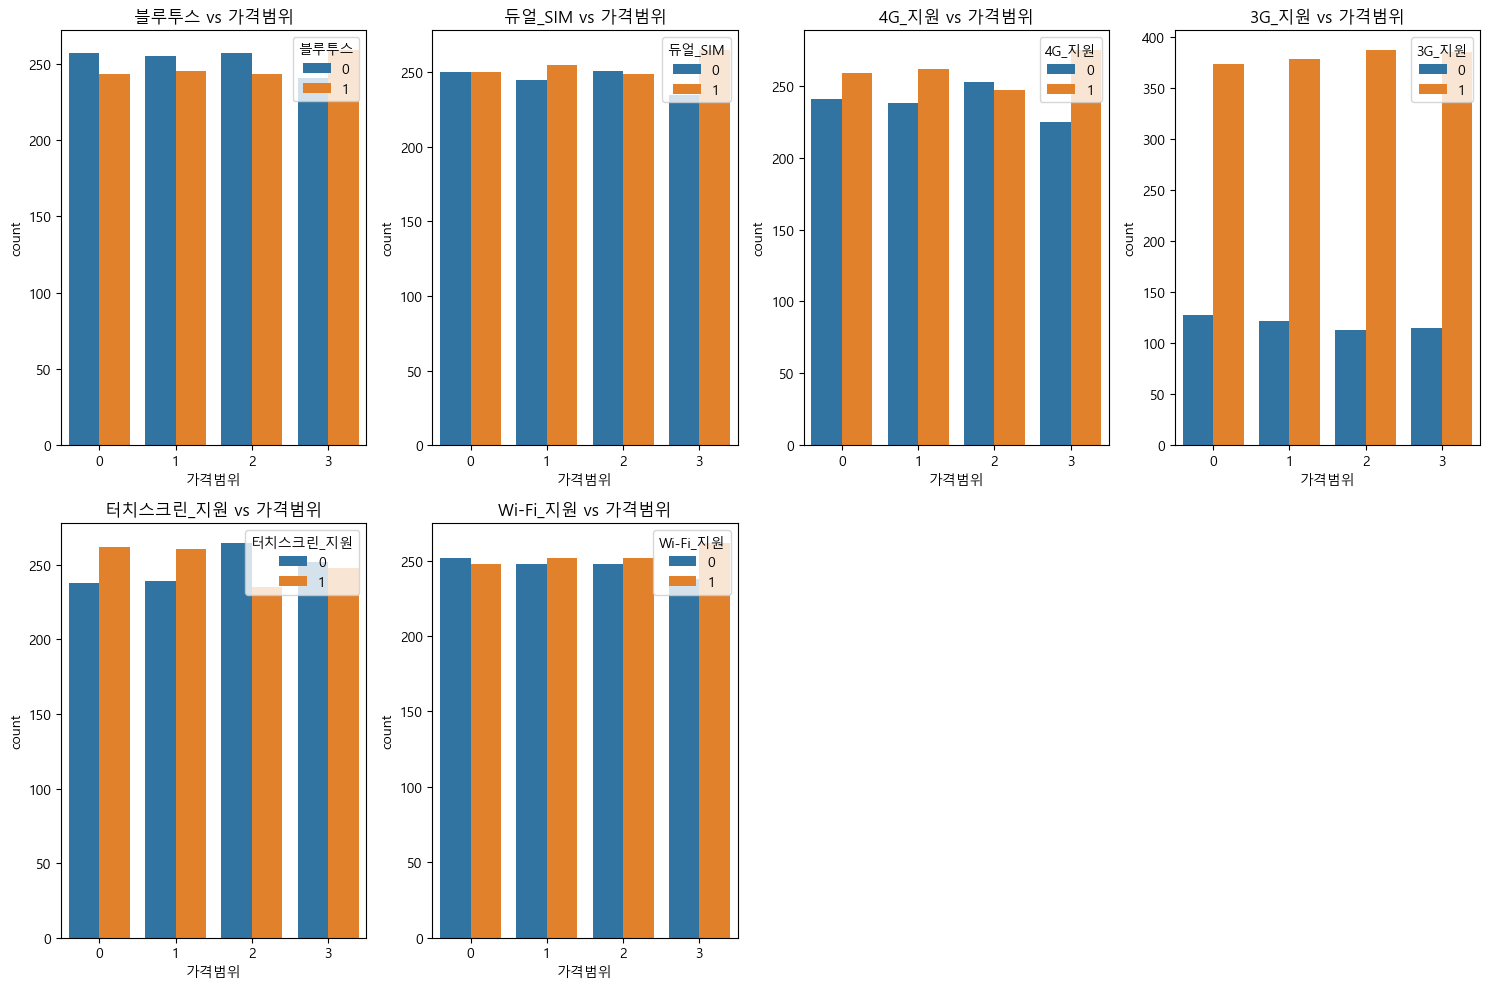

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연속형 변수 목록
continuous_vars = ['블루투스','듀얼_SIM','4G_지원','3G_지원','터치스크린_지원','Wi-Fi_지원']

# 박스플롯을 그리기 위한 함수
def plot_boxplots(df, continuous_vars, target_var):
    num_plots = len(continuous_vars)

    # 한 행에 4개씩 표시, 그에 따른 행(row) 수 계산
    num_cols = 4
    num_rows = (num_plots + num_cols - 1) // num_cols  # 올림 계산

    plt.figure(figsize=(15, num_rows * 5))  # 그래프 간격을 위해 높이를 5로 조정

    for i, col in enumerate(continuous_vars):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.countplot(x=df[target_var], hue=df[col],data=df)
        plt.title(f'{col} vs {target_var}')

    plt.tight_layout()
    plt.show()

# 박스플롯 그리기
plot_boxplots(df, continuous_vars, '가격범위')


- 가격 범위가 가장 높을 때 블루투스와 듀얼 sim이 존재할 확률이 높다.
- 가격 범위가 높을수록 wifi, 4g.3g 지원이 될 확률이 높다.
- 터치스크린은 가격범위가 낮은 구간에서 지원이 된다.

#### 변수간 상관관계 분석

<Axes: >

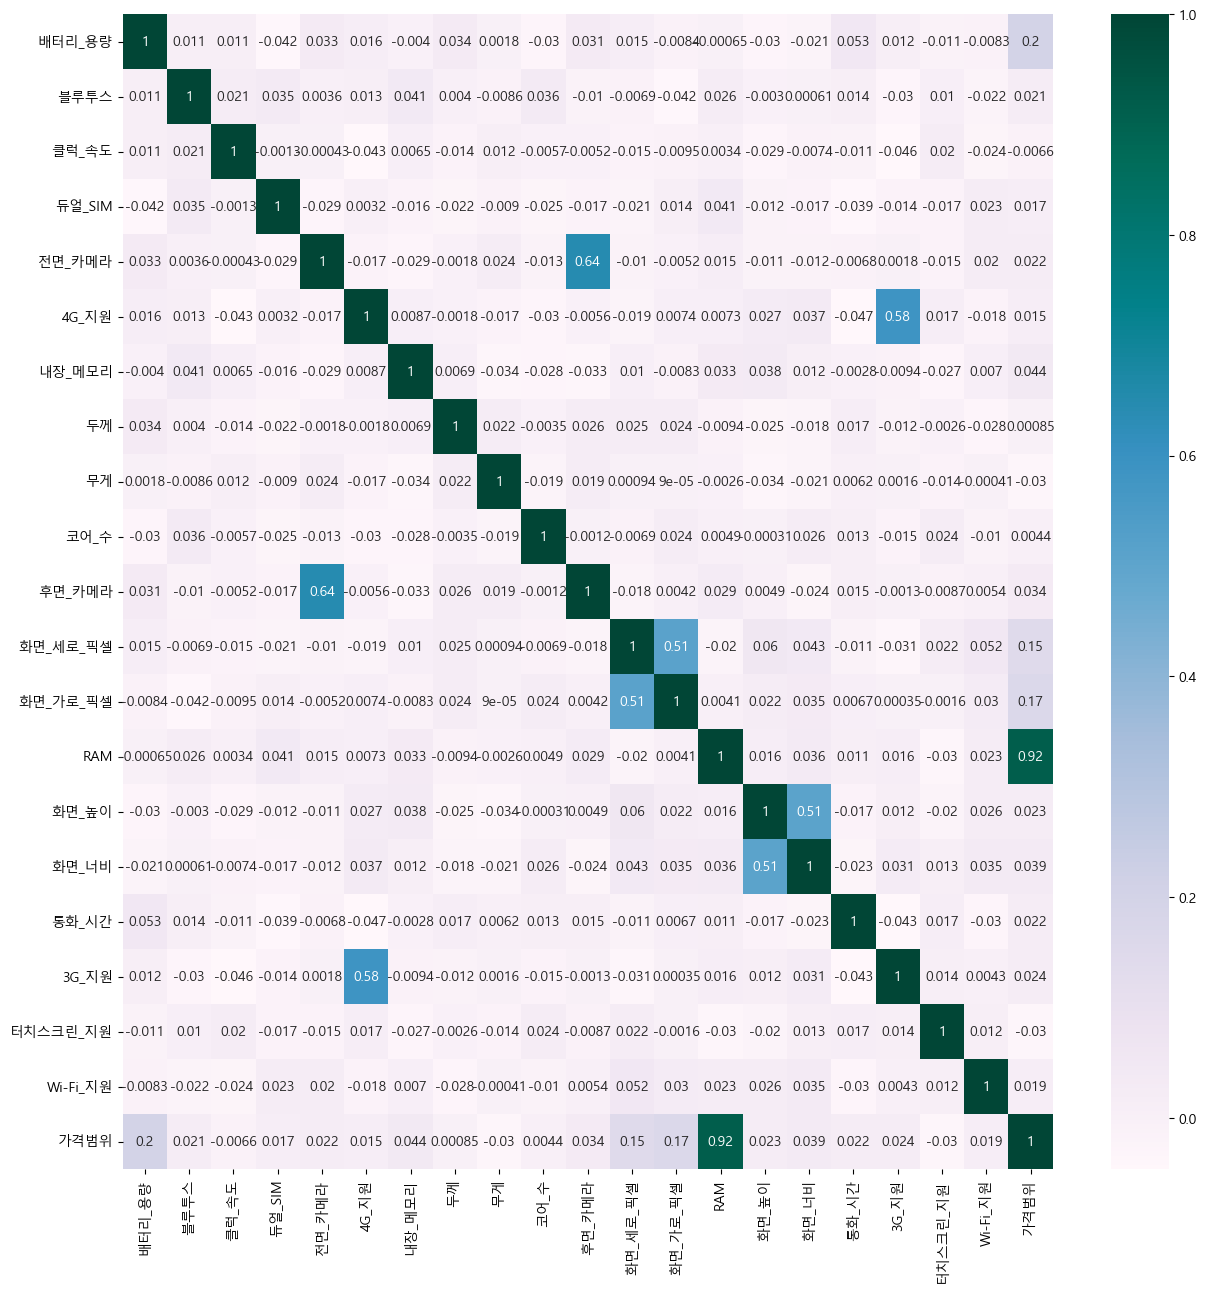

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cmap= 'PuBuGn')

- 전면 카메라와 후면 카메라가 상관 관계에 있다. => 카메라로 새로운 변수 만들어도 좋을듯
- 4g, 3g 지원이 관계가 있다. => 데이터 지원으로 새로운 변수 만들어도 좋음
- 세로, 가로 픽셀 => 픽셀로 새로운 변수 만들기
- ram이 가격 범위에 큰 상관관계를 보임 -> 예측할 때 큰 영향을 미칠듯  
- 화면 너비와 높이도 상관관계로 보이는 것으로 보아 넓이라는 새로운 변수 만들어도 좋음

In [18]:
df.groupby('화면_너비')['화면_높이'].mean()
# 화면 노비가 넓을수록 높이가 큰 것으로 확인된다. 둘을 곱해서 넓이라는 새로운 변수를 만들어보겠다. 

화면_너비
0     10.494444
1     10.433333
2     10.717949
3     10.618090
4     10.582418
5     10.819876
6     12.030769
7     12.704545
8     13.768000
9     13.865979
10    14.214953
11    14.964286
12    15.764706
13    16.612245
14    16.878788
15    17.387097
16    17.551724
17    18.526316
18    19.000000
Name: 화면_높이, dtype: float64

In [ ]:
df.후면_카메라.value_counts()
df.전면_카메라.value_counts()

후면_카메라
10    122
7     119
9     112
20    110
1     104
14    104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: count, dtype: int64

전면_카메라
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='후면_카메라'>

Text(0.5, 1.0, '후면 카메라별 전면 카메라 평균')

Text(0.5, 0, '후면 카메라 개수')

Text(0, 0.5, '전면 카메라 평균 개수')

(0.0, 9.459545454545456)

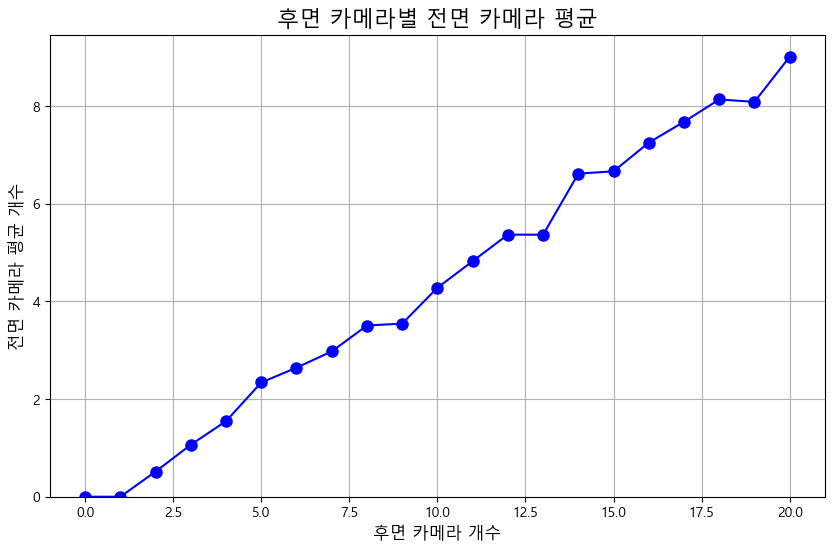

In [ ]:
import matplotlib.pyplot as plt

# 후면 카메라별 전면 카메라 평균을 계산
camera = df.groupby('후면_카메라')['전면_카메라'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
camera.plot(kind='line', color='blue', marker='o', linestyle='-', markersize=8)

# 그래프 제목과 축 레이블 추가
plt.title('후면 카메라별 전면 카메라 평균', fontsize=16)
plt.xlabel('후면 카메라 개수', fontsize=12)
plt.ylabel('전면 카메라 평균 개수', fontsize=12)
plt.grid(True)
plt.ylim(0)
plt.show()
# 후면카메라와 전면카메라의 성능이 함께 올라간다.
# 후면카메라가 좋으면 전면카메라의 성능도 올라간다는 의미

In [ ]:
df[df['4G_지원']==1]['3G_지원'].value_counts()

3G_지원
1    1043
Name: count, dtype: int64

<Axes: xlabel='4G_지원', ylabel='count'>

Text(0.5, 1.0, '4g지원 별 3g 지원 개수')

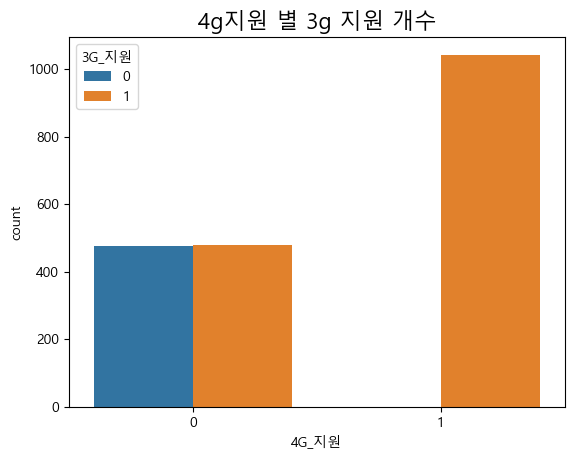

In [ ]:
sns.countplot(x=df['4G_지원'], hue=df['3G_지원'],data=df)
plt.title('4g지원 별 3g 지원 개수', fontsize=16)

plt.show()
# 4g 지원을 해주면 모두 3g 지원을 해준다.
# 4g 지원을 해주지 않는 것 중에는 3g 지원을 해주지 않는 것도 있는 것으로 보아
# 2g 핸드폰도 있는 것으로 확인된다.
# 이 것을 2g, 3g ,4g 순으로 나쁘기 때문에
# 하나의 새로운 데이터 열을 만들어서 4g를 가장 높은 수인 2로 두어 범주로 만든다.


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='화면_가로_픽셀', ylabel='화면_세로_픽셀'>

Text(0.5, 1.0, '화면 가로 픽셀과 세로 픽셀의 상관관계')

Text(0.5, 0, '화면 가로 픽셀')

Text(0, 0.5, '화면 세로 픽셀')

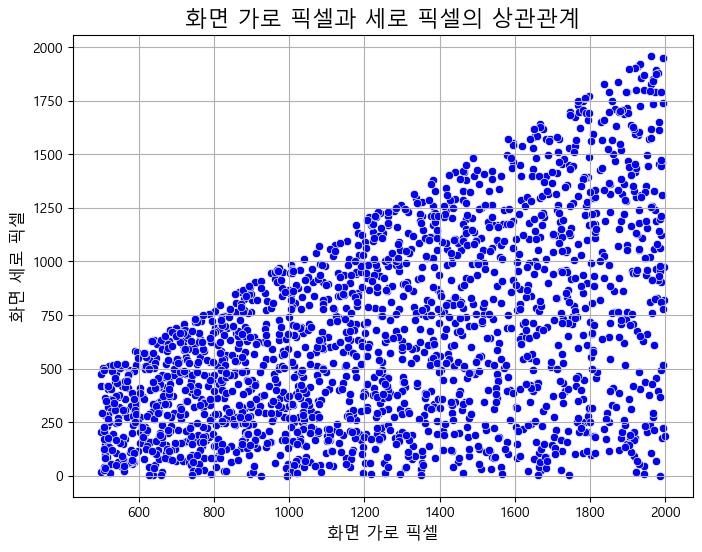

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(x='화면_가로_픽셀', y='화면_세로_픽셀', data=df, color='blue')

# 그래프 제목과 축 레이블 추가
plt.title('화면 가로 픽셀과 세로 픽셀의 상관관계', fontsize=16)
plt.xlabel('화면 가로 픽셀', fontsize=12)
plt.ylabel('화면 세로 픽셀', fontsize=12)

# 그리드 추가
plt.grid(True)

# 그래프 보여주기
plt.show()


화면_세로_픽셀
0       1490.500000
1        926.000000
2        660.000000
3       1145.500000
4        910.666667
           ...     
1901    1920.000000
1914    1928.000000
1920    1933.000000
1949    1994.000000
1960    1963.000000
Name: 화면_가로_픽셀, Length: 1137, dtype: float64

<Axes: xlabel='가격범위', ylabel='RAM'>

Text(0.5, 1.0, '가격범위 vs RAM')

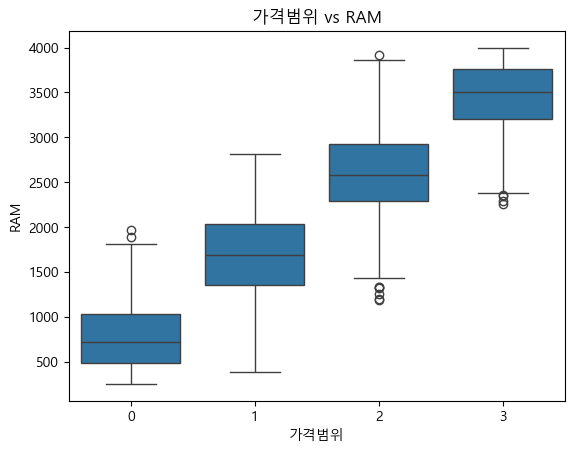

In [ ]:
sns.boxplot(x=df['가격범위'], y=df['RAM'])
plt.title(f'{'가격범위'} vs {'RAM'}')
plt.show()

## 모델링
- 피처가 많을수록 특히 분류에서 과적합이 발생할 수 있다.
- 타겟에 영향을 많이 주는 피처들을 선택하는 feature_selection을 해보는 것이 어떨까 
- 상관관계가 어느정도 있어보이는 변수들을 활용해 파생변수를 만들며 열을 줄여가보겠다.

#### 파생변수 만들기 
- 전면 카메라와 후면 카메라가 상관 관계에 있다. => 카메라 개수= 전면 + 후면 
- 4g, 3g 지원이 관계가 있다. => 2g, 3g, 4g를 원핫인코딩으로 2개의 열을 만든 것보다 라벨인코딩으로 하나의 열로 만들어보겠다. 
- 세로, 가로 픽셀 => 픽셀로 새로운 변수 만들기 -> 해상도 변수
- ram이 가격 범위에 큰 상관관계를 보임 -> 예측할 때 큰 영향을 미칠듯  
- 화면 너비와 높이도 상관관계로 보이는 것으로 보아 넓이라는 새로운 변수 만들어도 좋음

In [28]:
df_orgin= df.copy()
df_new= df.copy()
df.columns

Index(['배터리_용량', '블루투스', '클럭_속도', '듀얼_SIM', '전면_카메라', '4G_지원', '내장_메모리', '두께',
       '무게', '코어_수', '후면_카메라', '화면_세로_픽셀', '화면_가로_픽셀', 'RAM', '화면_높이', '화면_너비',
       '통화_시간', '3G_지원', '터치스크린_지원', 'Wi-Fi_지원', '가격범위'],
      dtype='object')

In [29]:
df_new['카메라_개수']=df_new['전면_카메라']+df_new['후면_카메라']
df_new['해상도']=df_new['화면_세로_픽셀']+df_new['화면_가로_픽셀']
df_new['화면_넓이']=df_new['화면_높이']+df_new['화면_너비']
df_new=df_new.drop(['전면_카메라','후면_카메라','화면_세로_픽셀','화면_가로_픽셀','화면_높이','화면_너비'], axis=1)

In [30]:
df_new[['4G_지원','3G_지원']] 
import numpy as np

# '데이터_지원' 열을 조건에 따라 생성
df_new['데이터_지원'] = np.where((df_new['4G_지원'] == 1) & (df_new['3G_지원'] == 1), 2,
                     np.where((df_new['4G_지원'] == 0) & (df_new['3G_지원'] == 1), 1, 0))
df_new=df_new.drop(['4G_지원','3G_지원'], axis=1)


,4G_지원,3G_지원
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
1995,1,1
1996,0,1
1997,1,1
1998,1,1


In [31]:
df_new.head()

,배터리_용량,블루투스,클럭_속도,듀얼_SIM,내장_메모리,두께,무게,코어_수,RAM,통화_시간,터치스크린_지원,Wi-Fi_지원,가격범위,카메라_개수,해상도,화면_넓이,데이터_지원
0,842,0,2.2,0,7,0.6,188,2,2549,19,0,1,1,3,776,16,0
1,1021,1,0.5,1,53,0.7,136,3,2631,7,1,0,2,6,2893,20,2
2,563,1,0.5,1,41,0.9,145,5,2603,9,1,0,2,8,2979,13,2
3,615,1,2.5,0,10,0.8,131,6,2769,11,0,0,2,9,3002,24,1
4,1821,1,1.2,0,44,0.6,141,2,1411,15,1,0,1,27,2420,10,2


<Figure size 1500x1500 with 0 Axes>

<Axes: >

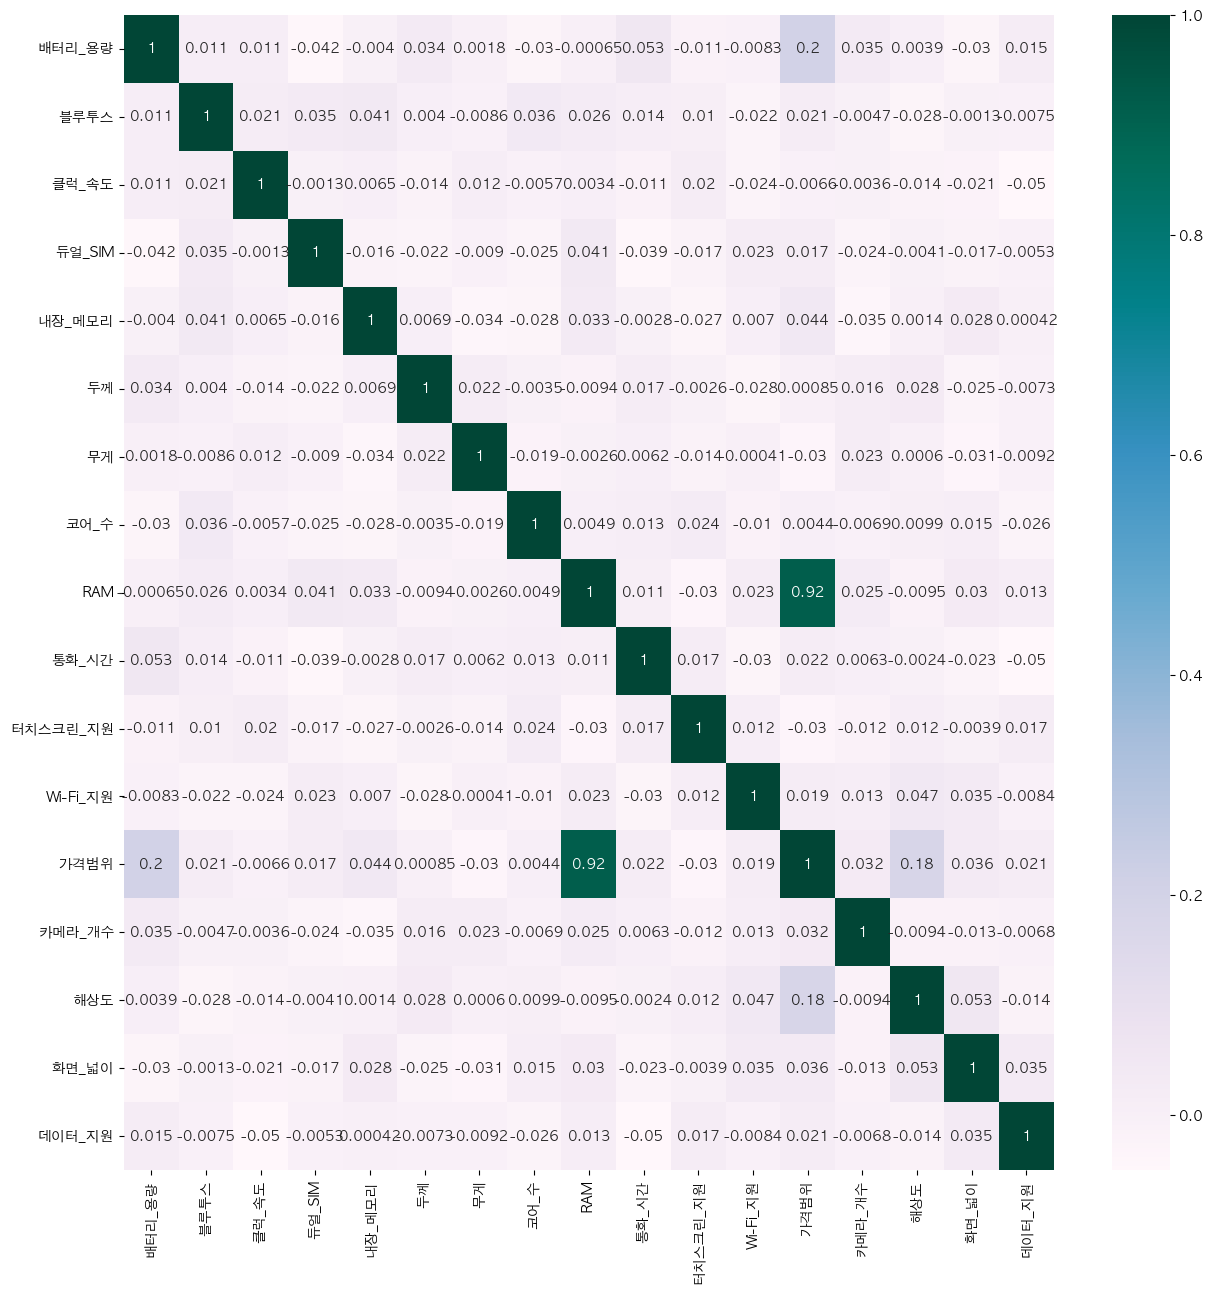

In [32]:
plt.figure(figsize = (15,15))
sns.heatmap(df_new.corr(),annot=True, cmap= 'PuBuGn')

RFE 선택된 중요 특성: Index(['배터리_용량', '클럭_속도', '내장_메모리', '두께', '무게', 'RAM', '통화_시간', '카메라_개수',
       '해상도', '화면_넓이'],
      dtype='object')


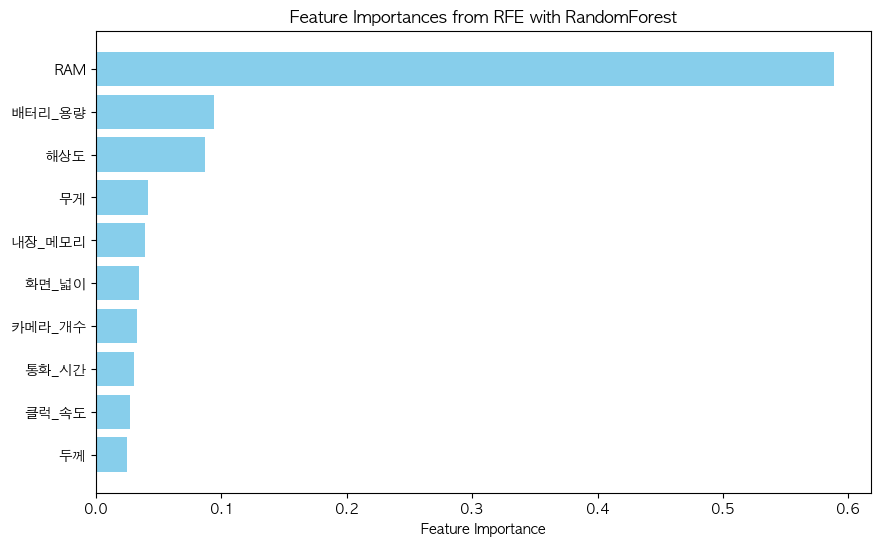

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# RandomForest 분류 모델을 사용하여 RFE 기반의 feature selection 수행
def rfe_feature_selection(X, y, n_features_to_select=10):
    model = RandomForestClassifier(random_state=42)
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    X_rfe = rfe.fit_transform(X, y)
    
    # RFE로 선택된 특성
    selected_features = X.columns[rfe.support_]
    print(f"RFE 선택된 중요 특성: {selected_features}")
    
    # 선택된 특성의 중요도를 모델을 통해 추출
    model.fit(X_rfe, y)  # 선택된 특성들로 모델 재학습
    importances = model.feature_importances_
    
    # 중요도 데이터프레임으로 변환 후 정렬
    importance_df = pd.DataFrame({'feature': selected_features, 'importance': importances})
    importance_df = importance_df.sort_values(by='importance', ascending=False)
    
    # 중요도 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importances from RFE with RandomForest')
    plt.gca().invert_yaxis()  # 높은 중요도가 위로 오도록 역순 정렬
    plt.show()
    
    return X_rfe, importance_df

# RFE를 사용하여 10개의 중요한 특성 선택
X_rfe_selected, feature_importances_df = rfe_feature_selection(X_train, y_train, n_features_to_select=10)


#### 데이터 분리 후 분포 모델 선택
- 데이터의 행이 2000개 밖에 없는 소규모 데이터
- 다중분류 문제에 직면해 있는 데이터
- 타겟 변수와 상관관계가 높은 변수가 많이 없는 데이터 

##### 딥러닝 모델을 사용하기 보다 소규모 데이터셋인 만큼 머신러닝 모델을 적극 활용해보자

In [43]:
X=df_new.drop('가격범위',axis=1)
y=df_new['가격범위']

In [44]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

- 배터리 용량과 해상도 이후 피처들에 대한 중요도는 비슷한 것 같음. 
- 10개 정도만 뽑아서 모델링 해보겠다. 

In [46]:
df_for_modeling=df_new[['배터리_용량', '클럭_속도', '내장_메모리', '두께', '무게', 'RAM', '통화_시간', '카메라_개수',
       '해상도', '화면_넓이']]
# df_for_modeling=S.fit_transform(df_for_modeling)

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 데이터 준비
X = df_new.drop('가격범위', axis=1)
y = df_new['가격범위']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_selected = X_train[['배터리_용량', '클럭_속도', '내장_메모리', '두께', '무게', 'RAM', '통화_시간', '카메라_개수', '해상도', '화면_넓이']]
X_test_selected = X_test[['배터리_용량', '클럭_속도', '내장_메모리', '두께', '무게', 'RAM', '통화_시간', '카메라_개수', '해상도', '화면_넓이']]

# 스케일링 (필요한 모델용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# 모델 정의
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    "KNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=200, random_state=42, multi_class='multinomial'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "MLP": MLPClassifier(max_iter=300, random_state=42)
}

# 각 모델 학습 및 정확도 계산
for name, model in models.items():
    if name in ["SVM", "KNeighbors", "MLP",'LogisticRegression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
        
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} 모델의 테스트 세트 정확도: {accuracy:.4f}")


RandomForestClassifier(random_state=42)

RandomForest 모델의 테스트 세트 정확도: 0.9050


SVC(probability=True, random_state=42)

SVM 모델의 테스트 세트 정확도: 0.9050


KNeighborsClassifier()

KNeighbors 모델의 테스트 세트 정확도: 0.6900


LogisticRegression(max_iter=200, multi_class='multinomial', random_state=42)

LogisticRegression 모델의 테스트 세트 정확도: 0.9875


GradientBoostingClassifier(random_state=42)

GradientBoosting 모델의 테스트 세트 정확도: 0.9200


MLPClassifier(max_iter=300, random_state=42)

MLP 모델의 테스트 세트 정확도: 0.9650


### 최종 모델링 
- 로지스틱
- mlp 

In [66]:
# 하이퍼파라미터 그리드 설정
logistic_params = {
    'C': [1,10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 300]
}

# 로지스틱 회귀 모델 하이퍼파라미터 튜닝 및 평가
logistic_model = LogisticRegression(random_state=42)
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy', return_train_score=True)
logistic_grid.fit(X_train_scaled, y_train)
logistic_best_model = logistic_grid.best_estimator_
logistic_y_pred = logistic_best_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
print(f"로지스틱 회귀 최적 하이퍼파라미터: {logistic_grid.best_params_}")
print(f"로지스틱 회귀 테스트 세트 정확도: {logistic_accuracy:.4f}")

# MLP 모델 하이퍼파라미터 튜닝 및 평가
mlp_model = MLPClassifier(random_state=42)
mlp_grid = GridSearchCV(mlp_model, mlp_params, cv=5, scoring='accuracy', return_train_score=True)
mlp_grid.fit(X_train_scaled, y_train)
mlp_best_model = mlp_grid.best_estimator_
mlp_y_pred = mlp_best_model.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
print(f"MLP 최적 하이퍼파라미터: {mlp_grid.best_params_}")
print(f"MLP 테스트 세트 정확도: {mlp_accuracy:.4f}")

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='accuracy')

로지스틱 회귀 최적 하이퍼파라미터: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
로지스틱 회귀 테스트 세트 정확도: 0.9875


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [200, 300]},
             return_train_score=True, scoring='accuracy')

MLP 최적 하이퍼파라미터: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 200}
MLP 테스트 세트 정확도: 0.9875


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Logistic Regression Overfitting Check')

Text(0.5, 0, 'Hyperparameter Combinations')

Text(0, 0.5, 'Accuracy')

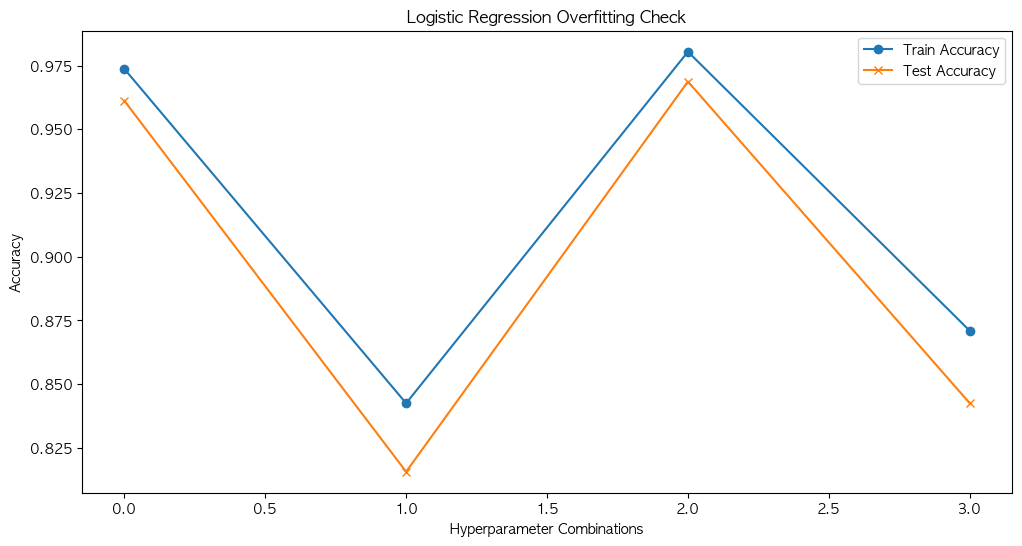

In [68]:
# 로지스틱 회귀 모델의 과적합 확인
logistic_train_scores = logistic_grid.cv_results_['mean_train_score']
logistic_test_scores = logistic_grid.cv_results_['mean_test_score']

# 하이퍼파라미터 조합에 따른 점수 비교
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(logistic_train_scores)), logistic_train_scores, label='Train Accuracy', marker='o')
plt.plot(np.arange(len(logistic_test_scores)), logistic_test_scores, label='Test Accuracy', marker='x')
plt.title("Logistic Regression Overfitting Check")
plt.xlabel("Hyperparameter Combinations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## 결론 
- softmax regression은 C값을 조심하며 과적합을 조심하는 것이 가장 좋은 성능을 가지는 것이 보인다. 
- 기본적으로 다중분류에 좋은 성능을 보였기 때문에 과적합만 조심하면 될 것 같다. 
- 모델의 성능은 정확도뿐만 아니라 모델의 복잡도 및 속도도 포함되기 때문에 softmax 회귀가 가장 좋은 성능을 보인다고 할 수 있다. 